# Calibration curves

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

## Data

In [12]:
llr_raw = np.load("../data/results/llr_carl_aux_grid.npy")
llr_cal = np.load("../data/results/llr_calibrated_carl_aux_grid.npy")

In [13]:
grid_res = 25

alpha_test = np.linspace(10., 400., grid_res)
beta_test = np.linspace(-1.1, -3., grid_res)

theta0, theta1 = np.meshgrid(alpha_test, beta_test)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T

bin_size = alpha_test[1] - alpha_test[0]
alpha_edges = np.linspace(alpha_test[0] - bin_size/2, alpha_test[-1] + bin_size/2, grid_res + 1)
bin_size = beta_test[1] - beta_test[0]
beta_edges = np.linspace(beta_test[0] - bin_size/2, beta_test[-1] + bin_size/2, grid_res + 1)

In [14]:
for i in range(625):
    print(i, theta_grid[i])

0 [10.  -1.1]
1 [26.25 -1.1 ]
2 [42.5 -1.1]
3 [58.75 -1.1 ]
4 [75.  -1.1]
5 [91.25 -1.1 ]
6 [107.5  -1.1]
7 [123.75  -1.1 ]
8 [140.   -1.1]
9 [156.25  -1.1 ]
10 [172.5  -1.1]
11 [188.75  -1.1 ]
12 [205.   -1.1]
13 [221.25  -1.1 ]
14 [237.5  -1.1]
15 [253.75  -1.1 ]
16 [270.   -1.1]
17 [286.25  -1.1 ]
18 [302.5  -1.1]
19 [318.75  -1.1 ]
20 [335.   -1.1]
21 [351.25  -1.1 ]
22 [367.5  -1.1]
23 [383.75  -1.1 ]
24 [400.   -1.1]
25 [10.         -1.17916667]
26 [26.25       -1.17916667]
27 [42.5        -1.17916667]
28 [58.75       -1.17916667]
29 [75.         -1.17916667]
30 [91.25       -1.17916667]
31 [107.5         -1.17916667]
32 [123.75        -1.17916667]
33 [140.          -1.17916667]
34 [156.25        -1.17916667]
35 [172.5         -1.17916667]
36 [188.75        -1.17916667]
37 [205.          -1.17916667]
38 [221.25        -1.17916667]
39 [237.5         -1.17916667]
40 [253.75        -1.17916667]
41 [270.          -1.17916667]
42 [286.25        -1.17916667]
43 [302.5         -1.179166

In [15]:
theta_idx = [100, 284, 49]

print(theta_grid[theta_idx])

[[ 10.          -1.41666667]
 [156.25        -1.97083333]
 [400.          -1.17916667]]


In [21]:
llr_calibration_nums = [np.load("../data/results/llr_alices_aux_calibrate_theta{}.npy".format(i)) for i in theta_idx]
llr_calibration_den = np.load("../data/results/llr_alices_aux_calibrate_ref.npy")
print(llr_calibration_den.shape)

(100000,)


## Plot calibration curves

skip=100

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([-100.,100.], [-100.,100.], ls="--", c="0.5")
for i in theta_idx:
    plt.scatter(
        llr_raw[i][::skip], llr_cal[i][::skip], s=5., alpha=0.5,
        label=r"$n_{{calib}} = {:.0f}$, $\beta = {:.1f}$".format(theta_grid[i,0], theta_grid[i,1])
    )
    
plt.legend()
    
#ax.set_yscale("log")
plt.xlim(-5., 4.)
plt.ylim(-5., 4.)
#plt.ylim(1.e-3, 2.)

plt.xlabel(r"Raw log likelihood ratio")
plt.ylabel(r"Calibrated log likelihood ratio")
    
plt.tight_layout()
plt.savefig("../figures/calibration_curve.pdf")

## Calibration histos

KeyboardInterrupt: 

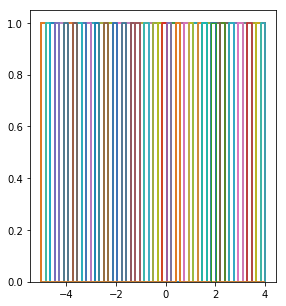

In [20]:
llr_range= -5., 4.

fig = plt.figure(figsize=(3*5,5))

for panel in range(3):
    ax = plt.subplot(1,3,panel+1)

    for num in llr_calibration_nums[panel]:
        plt.hist(
            num, range=llr_range, bins=50, histtype="step", lw=1.5,
            label=r"$n_{{calib}} = {:.0f}$, $\beta = {:.1f}$".format(theta_grid[i,0], theta_grid[i,1])
        )
    plt.hist(
        llr_calibration_den[theta_idx[panel]], range=llr_range, bins=50, histtype="step",
        lw=1.5, color="black",
        label=r"Reference (marginal model)"
    )
    plt.legend(loc="upper left")

    ax.set_yscale("log")
    plt.xlim(*llr_range)
    plt.ylim(1.,1.e4)
    plt.xlabel(r"Raw log likelihood ratio")
    
plt.tight_layout()
plt.savefig("../figures/calibration_histograms.pdf")
